In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import models, layers

In [65]:
num_features = 784
learning_rate = 0.001
training_steps = 30
batch_size = 130

In [66]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    layers.Dropout(0.33),
    tf.keras.layers.Dense(32, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
 ])

In [69]:
model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = training_steps, batch_size = batch_size, validation_data = (x_test, y_test))

Epoch 1/30
462/462 [==============================] - 6s 12ms/step - loss: 0.5720 - accuracy: 0.7973 - val_loss: 0.4335 - val_accuracy: 0.8452
Epoch 2/30
462/462 [==============================] - 6s 14ms/step - loss: 0.4037 - accuracy: 0.8532 - val_loss: 0.3895 - val_accuracy: 0.8593
Epoch 3/30
462/462 [==============================] - 5s 12ms/step - loss: 0.3695 - accuracy: 0.8647 - val_loss: 0.3738 - val_accuracy: 0.8620
Epoch 4/30
462/462 [==============================] - 6s 14ms/step - loss: 0.3477 - accuracy: 0.8729 - val_loss: 0.3611 - val_accuracy: 0.8673
Epoch 5/30
462/462 [==============================] - 5s 12ms/step - loss: 0.3313 - accuracy: 0.8796 - val_loss: 0.3587 - val_accuracy: 0.8718
Epoch 6/30
462/462 [==============================] - 6s 14ms/step - loss: 0.3185 - accuracy: 0.8830 - val_loss: 0.3477 - val_accuracy: 0.8714
Epoch 7/30
462/462 [==============================] - 5s 12ms/step - loss: 0.3078 - accuracy: 0.8849 - val_loss: 0.3445 - val_accuracy: 0.8715

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8978


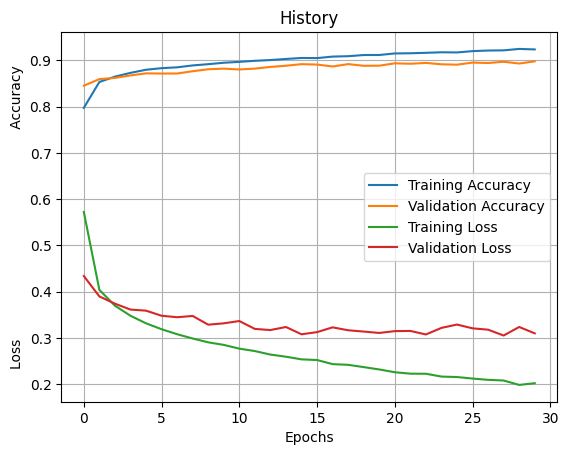

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History")
plt.grid()
plt.legend()
plt.show()

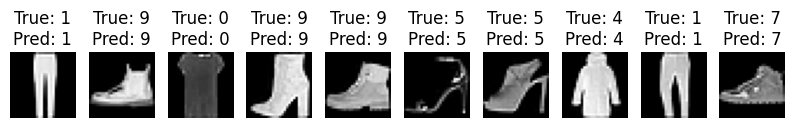

In [86]:
import random

random_indices = random.sample(range(len(x_test)), 10)
test_image = x_test[random_indices]
test_labels = y_test[random_indices]

predict = model(test_image)
predict_labels = tf.argmax(predict, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_image[i].reshape((28, 28)), cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {predict_labels[i]}")
    plt.axis('off')

Навчання нейронної мережі - це дуже примхлива і філігранна робота. Бо поперше існує дуже багато параметрів налаштування навчання, по друге реакція на зміну кожного з них має не пряму залежність. Я після багатьох експерементів отримав такі показники: "loss: 0.2018 - accuracy: 0.9236 - val_loss: 0.3096 - val_accuracy: 0.8978". В процесі експеременту вдалося навіть отримати результат accuracy більше 95%, а val_accuracy трохи більше 90%, але в погоні за кращим результатом не записав їх і не зміг повторити ці парамитри налаштування потім. Це теж буде мені важливим досвідом. В цілому при тестувані отримані непогані результати. Помилок не дуже багато.